In [1]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

import exp_config
from data_helper import *
from image_analysis import *
import accumulators


In [2]:
runNR=1312758

In [16]:
#accumulators
spectrum_mean=accumulators.Mean()
forward_mean=accumulators.Mean()
forward_hist_mean=accumulators.Mean()
side_mean=accumulators.Mean()
side_hist_mean=accumulators.Mean()
side_bright_pershot = []


#calculators
side_hist = Histogrammer(bins=100, range=(0,1000)) # TODO: set bin edges
forward_hist = Histogrammer(bins=100, range=(0,1000)) # TODO: set bin edges
side_bright_counter = RangeCounter(low=100) #set low edge threshold for bright pixel

for shot in tqdm(Run(exp_config.detector_keys,exp_config.database_keys, run=runNR)):
    # do something with the data.
    
    #spectrometer
    spectrum = np.mean(shot.spectrometer, axis=1)
    spectrum_mean.accumulate(spectrum)
    
    #image detectors
    side_mean.accumulate(shot.side_ccd)
    forward_mean.accumulate(shot.forward_ccd)
    
    side_bright_pershot.append(side_bright_counter(shot.side_ccd))
    
    #image hists
    side_hist_mean.accumulate(side_hist(shot.side_ccd))
    forward_hist_mean.accumulate(forward_hist(shot.forward_ccd))

        
                                    
        
        
    

100it [00:08, 11.19it/s]


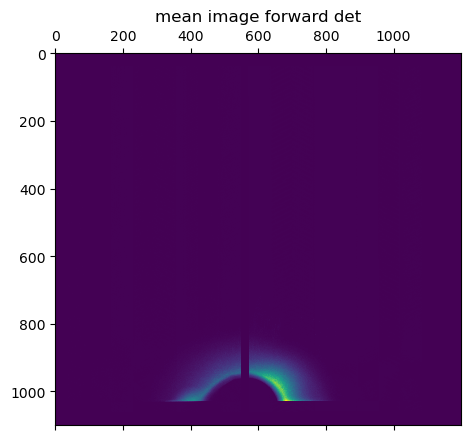

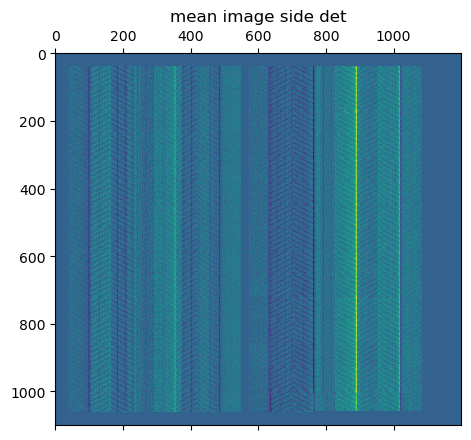

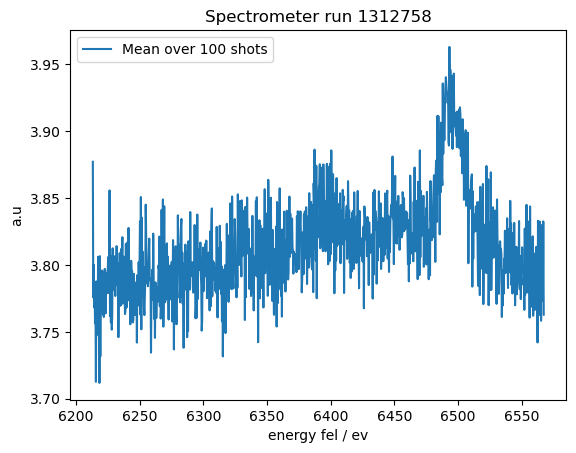

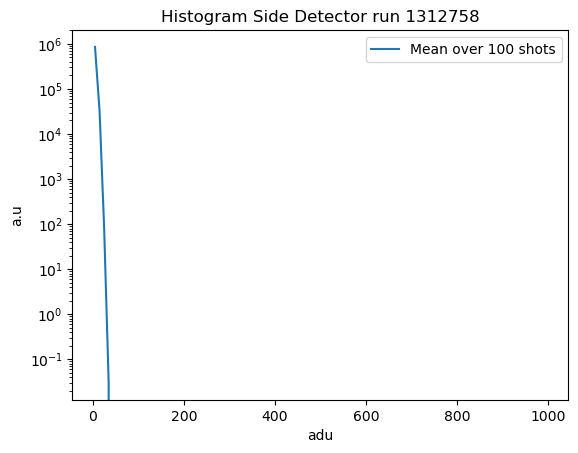

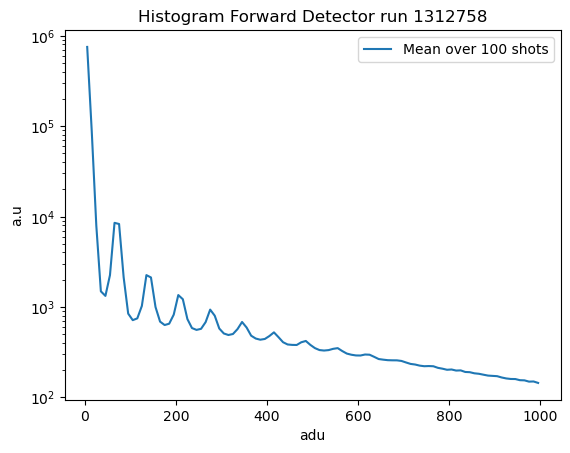

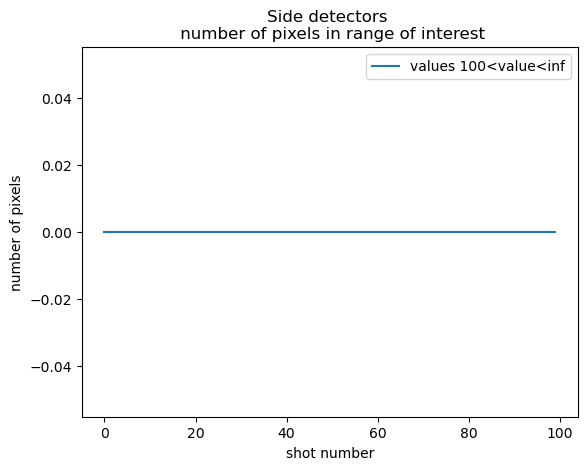

In [17]:
#mean images
plt.matshow(forward_mean)
plt.title("mean image forward det")
plt.show()

plt.matshow(side_mean)
plt.title("mean image side det")
plt.show()


#Spectrometer Plot
plt.plot(exp_config.spectrometer_axis_iron, spectrum_mean.value,label=f"Mean over {spectrum_mean.n} shots")
plt.xlabel("energy fel / ev")
plt.ylabel("a.u")
plt.title(f"Spectrometer run {runNR}")
plt.legend()
plt.show()



#Fluorescence Spectrum
plt.plot(side_hist.centers(), side_hist_mean.value,label=f"Mean over {side_hist_mean.n} shots")
plt.xlabel("adu")
plt.ylabel("a.u")
plt.title(f"Histogram Side Detector run {runNR}")
plt.yscale("log")
plt.legend()
plt.show()



#scatter Spectrum
plt.plot(forward_hist.centers(), forward_hist_mean.value,label=f"Mean over {forward_hist_mean.n} shots")
plt.xlabel("adu")
plt.ylabel("a.u")
plt.title(f"Histogram Forward Detector run {runNR}")
plt.yscale("log")
plt.legend()
plt.show()

plt.plot(side_bright_pershot, label =f"values {side_bright_counter.low}<value<{side_bright_counter.high}")
plt.legend()
plt.title("Side detectors \n number of pixels in range of interest")
plt.xlabel("shot number")
plt.ylabel("number of pixels")
plt.show()
